In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iphone732 = pd.read_excel('iphone732.xlsx')
iphone732.shape

(1293, 2)

In [3]:
iphone732.head()

,Date,Price
0,2016-09-16,69999
1,2016-09-17,69999
2,2016-09-18,69999
3,2016-09-19,69999
4,2016-09-20,69999


In [4]:
sns.set_style('whitegrid')

In [5]:
#sns.lmplot(x="Price",y="Date",data=iphone732)

In [6]:
import cufflinks as cf
cf.go_offline()

In [7]:
iphone732.iplot(kind='line',x='Date',y='Price')

In [6]:
iphone732['Month'] = iphone732['Date'].apply(lambda time: time.month)

In [7]:
iphone732['Year'] = iphone732['Date'].apply(lambda time: time.year)

In [8]:
iphone732['Day'] = iphone732['Date'].apply(lambda time: time.day)

In [9]:
iphone732.head()

,Date,Price,Month,Year,Day
0,2016-09-16,69999,9,2016,16
1,2016-09-17,69999,9,2016,17
2,2016-09-18,69999,9,2016,18
3,2016-09-19,69999,9,2016,19
4,2016-09-20,69999,9,2016,20


In [10]:
iphone732.drop('Date',inplace=True,axis=1)

In [11]:
iphone732.tail()

,Price,Month,Year,Day
1288,29500,3,2020,27
1289,29500,3,2020,28
1290,29500,3,2020,29
1291,29500,3,2020,30
1292,29500,3,2020,31


In [12]:
X=iphone732[['Day','Month','Year']].iloc[0:1293].values
y=iphone732['Price'].values

In [13]:
X.shape

(1293, 3)

In [14]:
y.shape

(1293,)

In [15]:
#from sklearn.model_selection import train_test_split

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X

array([[  16,    9, 2016],
       [  17,    9, 2016],
       [  18,    9, 2016],
       ...,
       [  29,    3, 2020],
       [  30,    3, 2020],
       [  31,    3, 2020]], dtype=int64)

In [21]:
lm.predict([[1,4,2020]])

array([32588.42243799])

In [22]:
#predictions = lm.predict(X_test)

In [23]:
#sns.scatterplot(x=predictions,y=y_test)

In [24]:
lm.score(X,y)

0.9546008913044051

In [32]:
import pickle

In [34]:
with open('model_pickel_final','wb') as f:
    pickle.dump(lm,f)

In [27]:
my_model = pickle.load(open('model_predict.pkl','rb'))

In [28]:
int(my_model.predict([[1,4,2020]])[0])

32588

In [28]:
from sklearn.externals import joblib

C:\Users\shahs\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
joblib.dump(lm,'model_joblib')

['model_joblib']

In [30]:
mj = joblib.load('model_joblib')

In [31]:
mj.predict([[1,4,2020]])

array([32588.42243799])

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [82]:
X = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

C:\Users\shahs\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [83]:
X.shape

(1234, 3)

In [84]:
y.shape

(1234,)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [86]:
model = Sequential()

model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [87]:
model.fit(x=X,y=y,epochs=400)

Train on 1234 samples
Epoch 1/400
1234/1234 [==============================] - 1s 541us/sample - loss: 2952015253.3679
Epoch 2/400
1234/1234 [==============================] - 0s 69us/sample - loss: 2951986878.0292
Epoch 3/400
1234/1234 [==============================] - 0s 70us/sample - loss: 2951953237.8865
Epoch 4/400
1234/1234 [==============================] - 0s 75us/sample - loss: 2951906187.4100
Epoch 5/400
1234/1234 [==============================] - 0s 65us/sample - loss: 2951841041.8412
Epoch 6/400
1234/1234 [==============================] - 0s 72us/sample - loss: 2951755869.3549
Epoch 7/400
1234/1234 [==============================] - 0s 67us/sample - loss: 2951650516.4344
Epoch 8/400
1234/1234 [==============================] - 0s 72us/sample - loss: 2951525512.9206
Epoch 9/400
1234/1234 [==============================] - 0s 150us/sample - loss: 2951383276.9141
Epoch 10/400
1234/1234 [==============================] - 0s 175us/sample - loss: 2951225111.6499
Epoch 11/400
1

1234/1234 [==============================] - 0s 73us/sample - loss: 2434895025.5818
Epoch 169/400
1234/1234 [==============================] - 0s 75us/sample - loss: 2428067041.7115
Epoch 170/400
1234/1234 [==============================] - 0s 86us/sample - loss: 2421188350.7553
Epoch 171/400
1234/1234 [==============================] - 0s 89us/sample - loss: 2414264333.6921
Epoch 172/400
1234/1234 [==============================] - 0s 73us/sample - loss: 2407315089.2188
Epoch 173/400
1234/1234 [==============================] - 0s 75us/sample - loss: 2400303511.4425
Epoch 174/400
1234/1234 [==============================] - 0s 74us/sample - loss: 2393264483.9935
Epoch 175/400
1234/1234 [==============================] - 0s 76us/sample - loss: 2386193247.0146
Epoch 176/400
1234/1234 [==============================] - 0s 77us/sample - loss: 2379048826.8136
Epoch 177/400
1234/1234 [==============================] - 0s 74us/sample - loss: 2371886430.5997
Epoch 178/400
1234/1234 [=========

1234/1234 [==============================] - 0s 79us/sample - loss: 956476887.9611
Epoch 335/400
1234/1234 [==============================] - 0s 74us/sample - loss: 947692661.8347
Epoch 336/400
1234/1234 [==============================] - 0s 64us/sample - loss: 938939979.0989
Epoch 337/400
1234/1234 [==============================] - 0s 71us/sample - loss: 930227285.4716
Epoch 338/400
1234/1234 [==============================] - 0s 73us/sample - loss: 921565326.5219
Epoch 339/400
1234/1234 [==============================] - 0s 70us/sample - loss: 912934340.2528
Epoch 340/400
1234/1234 [==============================] - 0s 73us/sample - loss: 904384146.6710
Epoch 341/400
1234/1234 [==============================] - 0s 73us/sample - loss: 895832916.2269
Epoch 342/400
1234/1234 [==============================] - 0s 73us/sample - loss: 887327951.3517
Epoch 343/400
1234/1234 [==============================] - 0s 74us/sample - loss: 878883985.0113
Epoch 344/400
1234/1234 [===================

In [88]:
losses=pd.DataFrame(model.history.history)

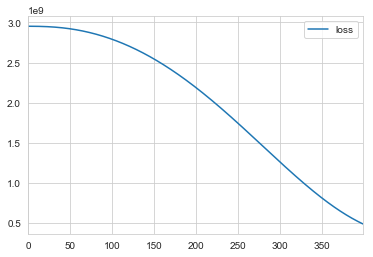

In [89]:
losses.plot()

In [97]:
pr=[[12,5,2020]]

In [98]:
pr = scaler.transform(pr)
pr

array([[0.36666667, 0.36363636, 1.        ]])

In [99]:
model.predict(pr)

array([[41329.52]], dtype=float32)

In [100]:
y

array([69999, 69999, 69999, ..., 29999, 29999, 29999], dtype=int64)